# Procesamiento de Lenguaje Natural (PLN)

PPT 7 PAG 46

Buscar mas informacion sobre GPT y BERT

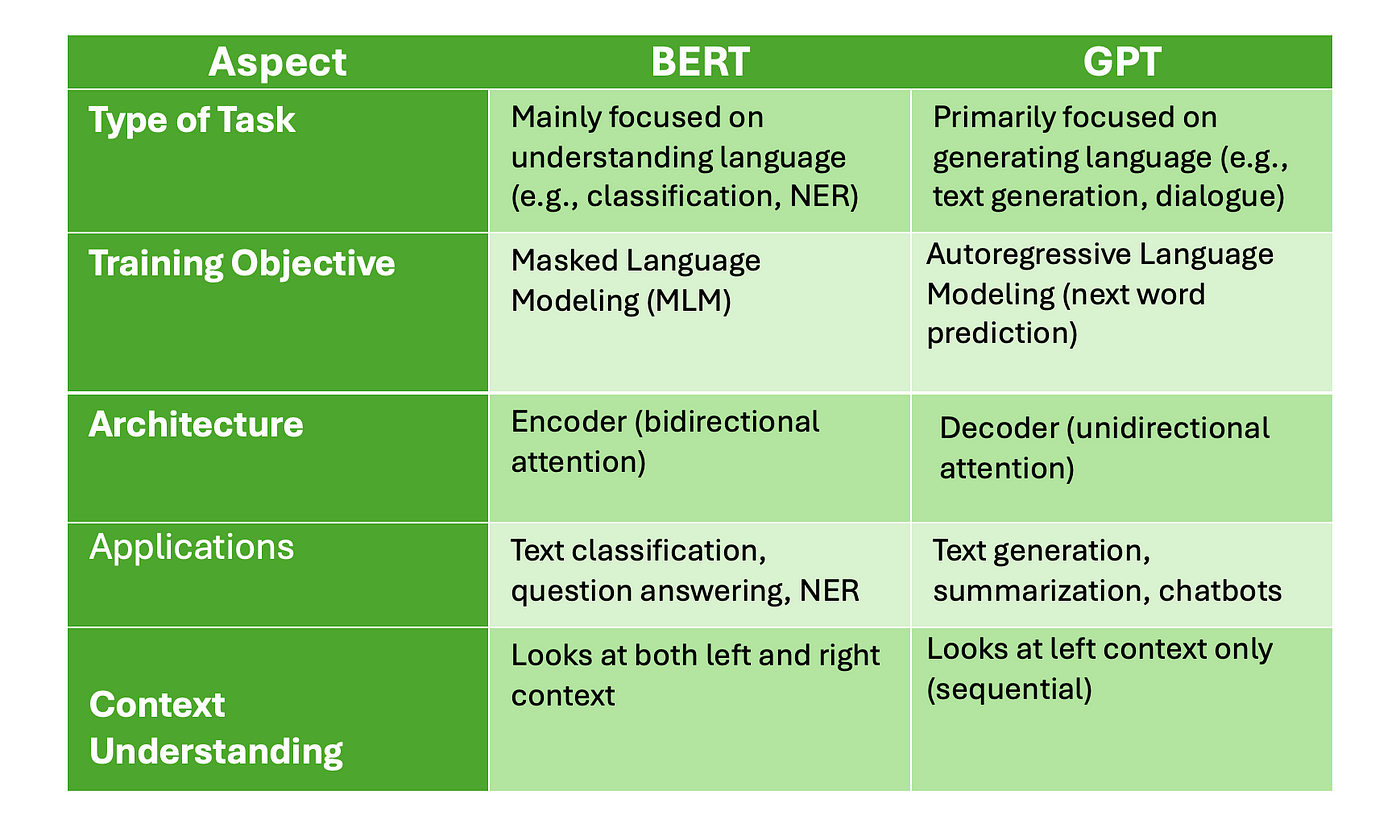

In [ ]:
!pip install pytumblr

In [ ]:
!pip install pytumblr requests requests_oauthlib


In [ ]:
import webbrowser
from requests_oauthlib import OAuth1Session

# Tus claves de la app Tumblr
consumer_key = 'nDCu5melixe8VJa0OsNJIZACyGx2YwEBNmYqHrOkRrG6x6mVLs'
consumer_secret = 'wmyBQpRJEpzlhnHgFLYw9qFLDAjbr5iFPsLf18TqzZ8WrrK2Ap'

# URLS de OAuth de Tumblr
request_token_url = 'https://www.tumblr.com/oauth/request_token'
authorize_url = 'https://www.tumblr.com/oauth/authorize'
access_token_url = 'https://www.tumblr.com/oauth/access_token'

In [ ]:
# 1. Crear sesión OAuth
oauth = OAuth1Session(consumer_key, client_secret=consumer_secret)

# 2. Obtener token de solicitud
fetch_response = oauth.fetch_request_token(request_token_url)
resource_owner_key = fetch_response.get('oauth_token')
resource_owner_secret = fetch_response.get('oauth_token_secret')

In [ ]:


# 3. Redirigir al usuario para autorizar
authorization_url = oauth.authorization_url(authorize_url)
print("Abre este enlace y autoriza la app:")
print(authorization_url)
webbrowser.open(authorization_url)

# 4. Tumblr En lugar de pedir un PIN, pide que el usuario copie la URL completa después de autorizar
redirect_response = input('Pega aquí la URL completa a la que fuiste redirigido tras autorizar: ')

# Extraer el oauth_verifier de la URL
from urllib.parse import parse_qs, urlparse
parsed_url = urlparse(redirect_response)
oauth_verifier = parse_qs(parsed_url.query)['oauth_verifier'][0]

# 5. Obtener el token de acceso final
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=resource_owner_key,
    resource_owner_secret=resource_owner_secret,
    verifier=oauth_verifier
)


access_token_response = oauth.fetch_access_token(access_token_url)

# Resultado final:
oauth_token = access_token_response.get('oauth_token')
oauth_secret = access_token_response.get('oauth_token_secret')

print("✅ oauth_token:", oauth_token)
print("✅ oauth_secret:", oauth_secret)


Abre este enlace y autoriza la app:
https://www.tumblr.com/oauth/authorize?oauth_token=k9sE2YXVSR9KlBdwzHssbismF6M0tP4Q2KJDNK4boxqhwhPeIJ
Pega aquí la URL completa a la que fuiste redirigido tras autorizar: http://localhost:8000/callback?oauth_token=k9sE2YXVSR9KlBdwzHssbismF6M0tP4Q2KJDNK4boxqhwhPeIJ&oauth_verifier=wdx8vUyR0uVBs8dsYcy2AEt1iJ1gfhJZgHratVF1KgYP2fdZuK#_=_
✅ oauth_token: iLW4uOVgNzdSLU9YzX3jyIDqueL5VwEBBbGdDcGaStjjrtcuLQ
✅ oauth_secret: 9WiN95BJWIJbJwgEUaYlqlrN7vgbbFeqrFCQN0ol4O1WM1yP8S


In [ ]:
import pytumblr

client = pytumblr.TumblrRestClient(
    consumer_key,
    consumer_secret,
    oauth_token,
    oauth_secret
)

posts = client.posts('sanctus-ingenium', limit=3)

for post in posts['posts']:
    print("Tipo:", post['type'])
    print("Resumen:", post.get('summary', 'Sin resumen'))


Tipo: answer
Resumen: heeeeeeeeyyy i really appreciate your posts where you talk about the process of creating your work! can you tell how carefully...
Tipo: photo
Resumen: my eyes are up here
Tipo: answer
Resumen: https://www.tumblr.com /sanctus-ingenium/787715307596857344/im-abandoning-this-one-and-releasing-it-into-the
do you have. a pose...


In [ ]:
import pytumblr
print(dir(pytumblr.TumblrRestClient))  # debería mostrar métodos como blog_posts, create_text, etc.


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_post_valid_options', '_send_post', 'avatar', 'blog_following', 'blog_info', 'blog_likes', 'create_audio', 'create_chat', 'create_link', 'create_photo', 'create_quote', 'create_text', 'create_video', 'dashboard', 'delete_post', 'drafts', 'edit_post', 'follow', 'followers', 'following', 'info', 'like', 'likes', 'notes', 'posts', 'queue', 'reblog', 'send_api_request', 'submission', 'tagged', 'unfollow', 'unlike']


---
---

In [ ]:
posts = client.posts('sanctus-ingenium', limit=3)
print(posts)


{'blog': {'ask': True, 'ask_anon': True, 'ask_page_title': 'Ask me anything', 'asks_allow_media': False, 'avatar': [{'width': 512, 'height': 512, 'url': 'https://64.media.tumblr.com/c62a1f10da255dd35f9ba892835760a9/6cb31eb2a4af33c8-ed/s512x512u_c1/ca372bc1a60f41bdcc494db95170dce4797f3329.png', 'accessories': []}, {'width': 128, 'height': 128, 'url': 'https://64.media.tumblr.com/c62a1f10da255dd35f9ba892835760a9/6cb31eb2a4af33c8-ed/s128x128u_c1/9d3ecfb23b8708f4a2ffa8ebe47c21b665499fc4.png', 'accessories': []}, {'width': 96, 'height': 96, 'url': 'https://64.media.tumblr.com/c62a1f10da255dd35f9ba892835760a9/6cb31eb2a4af33c8-ed/s96x96u_c1/ac607522068b2b48d64d949f00d7ae52863d77eb.png', 'accessories': []}, {'width': 64, 'height': 64, 'url': 'https://64.media.tumblr.com/c62a1f10da255dd35f9ba892835760a9/6cb31eb2a4af33c8-ed/s64x64u_c1/371a1a7e1f983f4568b5fac37d4643f54845bcc8.png', 'accessories': []}], 'can_chat': False, 'can_send_fan_mail': False, 'can_subscribe': False, 'description': 'all orig

In [ ]:
# Obtener las 5 últimas publicaciones de un blog
posts = client.posts('sanctus-ingenium.tumblr.com', limit=5)

for post in posts['posts']:
    print(post['type'], post.get('summary', 'No summary'))


answer heeeeeeeeyyy i really appreciate your posts where you talk about the process of creating your work! can you tell how carefully...
photo my eyes are up here
answer https://www.tumblr.com /sanctus-ingenium/787715307596857344/im-abandoning-this-one-and-releasing-it-into-the
do you have. a pose...
answer Tie that man up!
text i'm abandoning this WIP and releasing it into the wild, i couldn't get the framing right
this is for your gratification. aren't...


In [ ]:
posts = client.posts('sanctus-ingenium', limit=3)

for post in posts['posts']:
    print("Tipo:", post['type'])
    print("Resumen:", post.get('summary', 'Sin resumen'))
    print("Fecha:", post['date'])
    print("-" * 30)



Tipo: answer
Resumen: heeeeeeeeyyy i really appreciate your posts where you talk about the process of creating your work! can you tell how carefully...
Fecha: 2025-07-03 20:45:25 GMT
------------------------------
Tipo: photo
Resumen: my eyes are up here
Fecha: 2025-07-01 17:23:14 GMT
------------------------------
Tipo: answer
Resumen: https://www.tumblr.com /sanctus-ingenium/787715307596857344/im-abandoning-this-one-and-releasing-it-into-the
do you have. a pose...
Fecha: 2025-06-30 20:50:41 GMT
------------------------------


In [ ]:
posts = client.posts('sanctus-ingenium', limit=3)

for post in posts['posts']:
    print("Tipo:", post['type'])
    print("Resumen:", post.get('summary', 'Sin resumen'))
    print("Fecha:", post['date'])

    if post['type'] == 'photo':
        # photos es una lista, puede tener 1 o más imágenes
        for photo in post.get('photos', []):
            url = photo.get('original_size', {}).get('url')
            if url:
                print("URL de imagen:", url)
            else:
                print("No se encontró URL en esta foto.")
    print("-" * 30)


Tipo: answer
Resumen: heeeeeeeeyyy i really appreciate your posts where you talk about the process of creating your work! can you tell how carefully...
Fecha: 2025-07-03 20:45:25 GMT
------------------------------
Tipo: photo
Resumen: my eyes are up here
Fecha: 2025-07-01 17:23:14 GMT
URL de imagen: https://64.media.tumblr.com/2b0850ce05791015f837a2d09c5ea225/c99f7d38211e6ed6-93/s1280x1920/3cd6f882653629ac0fb374ceeee9a4768810d92e.gif
------------------------------
Tipo: answer
Resumen: https://www.tumblr.com /sanctus-ingenium/787715307596857344/im-abandoning-this-one-and-releasing-it-into-the
do you have. a pose...
Fecha: 2025-06-30 20:50:41 GMT
------------------------------
